# **Tuwaiq: Data Science and Machine Learning**

**Week #2 - Day #13**

Homework: Web Scraping Part 2

(https://scrapeme.live/shop/)

In [3]:
# ==========================
# Imports
# ==========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# ==========================
# Step 1: Load dataset
# ==========================
df = pd.read_csv("/content/Homework.csv")

print("Preview of dataset:")
print(df.head(), "\n")

Preview of dataset:
      Product                                        Description    Price  \
0   Bulbasaur  Bulbasaur can be seen napping in bright sunlig...   £63.00   
1     Ivysaur  There is a bud on this Pokémon’s back. To supp...   £87.00   
2    Venusaur  There is a large flower on Venusaur’s back. Th...  £105.00   
3  Charmander  The flame that burns at the tip of its tail is...   £48.00   
4  Charmeleon  Charmeleon mercilessly destroys its foes using...  £165.00   

   Availability  Quantity   SKU                     Category  \
0          True        45  4391    Categories: Pokemon, Seed   
1          True       142  7227    Categories: Pokemon, Seed   
2          True        30  7036    Categories: Pokemon, Seed   
3          True       206  9086  Categories: Lizard, Pokemon   
4          True       284  6565   Categories: Flame, Pokemon   

                               Tag  
0  Tags: bulbasaur, Overgrow, Seed  
1    Tags: ivysaur, Overgrow, Seed  
2   Tags: Overgrow, S

In [5]:
# ==========================
# Step 2: General info
# ==========================
print("Dataset Info:")
print(df.info(), "\n")

print("Dataset Description:")
print(df.describe(include='all'), "\n")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product       755 non-null    object
 1   Description   755 non-null    object
 2   Price         755 non-null    object
 3   Availability  755 non-null    bool  
 4   Quantity      755 non-null    int64 
 5   SKU           755 non-null    int64 
 6   Category      755 non-null    object
 7   Tag           755 non-null    object
dtypes: bool(1), int64(2), object(5)
memory usage: 42.2+ KB
None 

Dataset Description:
            Product                                        Description  \
count           755                                                755   
unique          755                                                755   
top     Blacephalon  A UB that appeared from an Ultra Wormhole, it ...   
freq              1                                                  1   
mean

In [6]:
# ==========================
# Step 3: Check for missing values & duplicates
# ==========================
print("Missing values per column:")
print(df.isnull().sum(), "\n")

print("Number of duplicates:", df.duplicated().sum(), "\n")

Missing values per column:
Product         0
Description     0
Price           0
Availability    0
Quantity        0
SKU             0
Category        0
Tag             0
dtype: int64 

Number of duplicates: 0 



In [7]:
# ==========================
# Step 4: Clean price column (remove symbols, convert to float)
# ==========================
df["Price"] = df["Price"].str.replace("£", "").str.replace(",", "").astype(float)

In [8]:
# ==========================
# Step 5: Numerical analysis
# ==========================
print("Price statistics:")
print(df["Price"].describe(), "\n")

print("Quantity statistics:")
print(df["Quantity"].describe(), "\n")

Price statistics:
count    755.000000
mean     110.948344
std       51.702359
min       25.000000
25%       66.000000
50%      111.000000
75%      157.000000
max      200.000000
Name: Price, dtype: float64 

Quantity statistics:
count    755.000000
mean     154.778808
std       84.303655
min       10.000000
25%       80.000000
50%      151.000000
75%      228.500000
max      300.000000
Name: Quantity, dtype: float64 



Availability counts:
Availability
True    755
Name: count, dtype: int64 



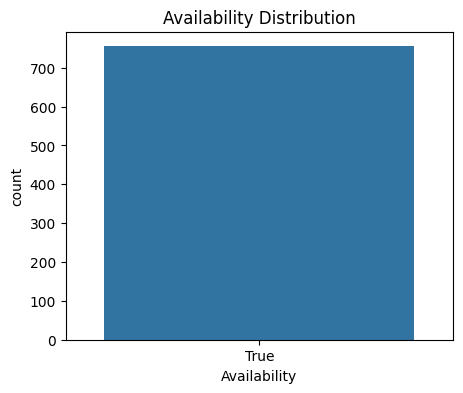

In [9]:
# ==========================
# Step 6: Availability distribution
# ==========================
availability_counts = df["Availability"].value_counts()
print("Availability counts:")
print(availability_counts, "\n")

# Visualization
plt.figure(figsize=(5,4))
sns.countplot(x="Availability", data=df)
plt.title("Availability Distribution")
plt.show()

Top Categories:
Category
Categories: Dragon, Pokemon        8
Categories: Mouse, Pokemon         6
Categories: Flame, Pokemon         5
Categories: Fox, Pokemon           5
Categories: Balloon, Pokemon       5
Categories: Mushroom, Pokemon      5
Categories: Fairy, Pokemon         4
Categories: Poison Pin, Pokemon    4
Categories: Drill, Pokemon         4
Categories: Bat, Pokemon           4
Name: count, dtype: int64 



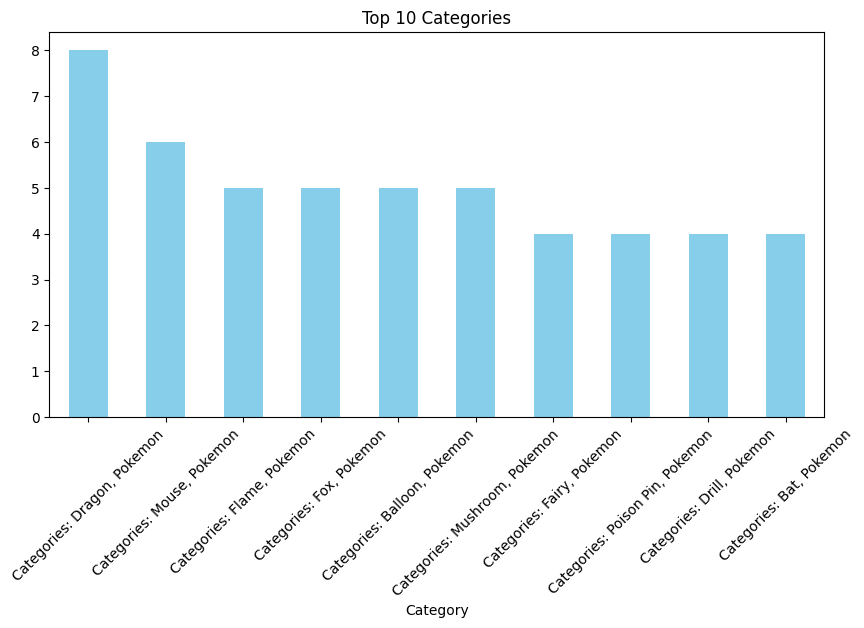

In [10]:
# ==========================
# Step 7: Categories analysis
# ==========================
print("Top Categories:")
print(df["Category"].value_counts().head(10), "\n")

plt.figure(figsize=(10,5))
df["Category"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Categories")
plt.xticks(rotation=45)
plt.show()

Top Tags:
Tag
Tags: Beast Boost, blacephalon, Fireworks       1
Tags: bulbasaur, Overgrow, Seed                 1
Tags: ivysaur, Overgrow, Seed                   1
Tags: Grassy Surge, Land Spirit, tapu-bulu      1
Tags: Land Spirit, Psychic Surge, tapu-lele     1
Tags: Electric Surge, Land Spirit, tapu-koko    1
Tags: kommo-o, Scaly, Soundproof                1
Tags: hakamo-o, Scaly, Soundproof               1
Tags: jangmo-o, Scaly, Soundproof               1
Tags: drampa, placid, Sap Sipper                1
Name: count, dtype: int64 



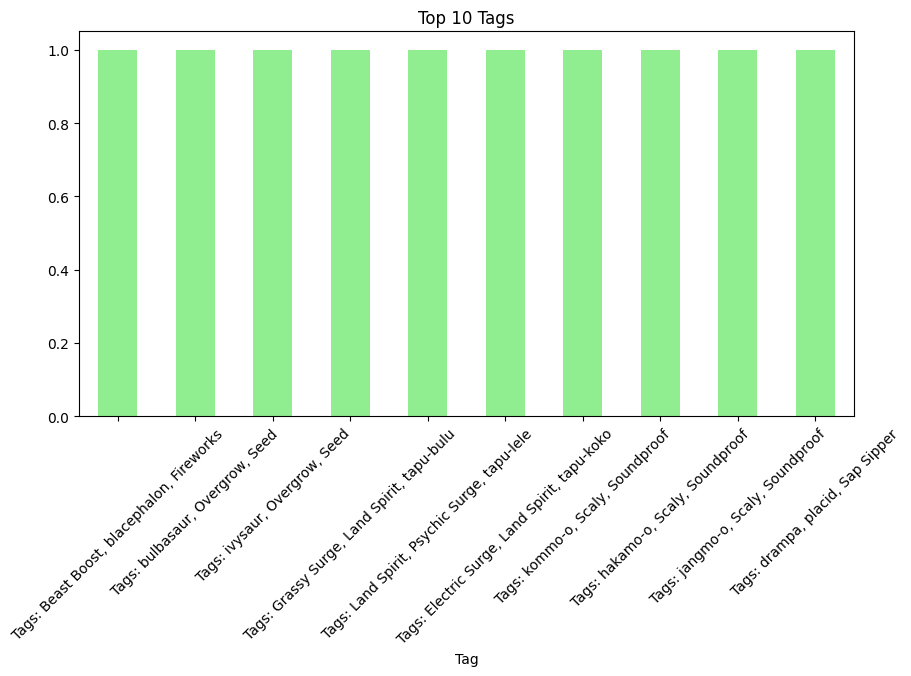

In [11]:
# ==========================
# Step 8: Tags analysis
# ==========================
print("Top Tags:")
print(df["Tag"].value_counts().head(10), "\n")

plt.figure(figsize=(10,5))
df["Tag"].value_counts().head(10).plot(kind="bar", color="lightgreen")
plt.title("Top 10 Tags")
plt.xticks(rotation=45)
plt.show()

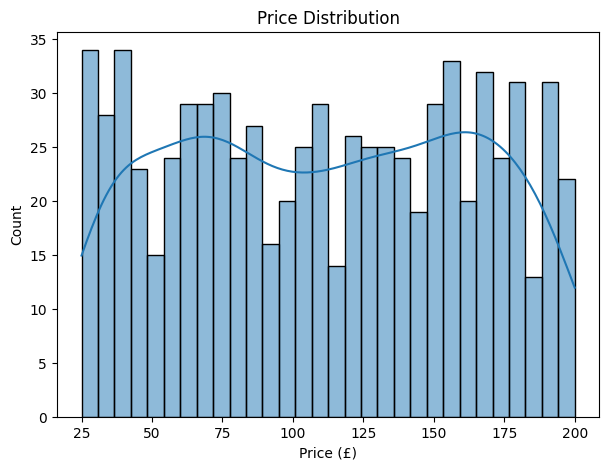

In [12]:
# ==========================
# Step 9: Price distribution
# ==========================
plt.figure(figsize=(7,5))
sns.histplot(df["Price"], bins=30, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price (£)")
plt.ylabel("Count")
plt.show()

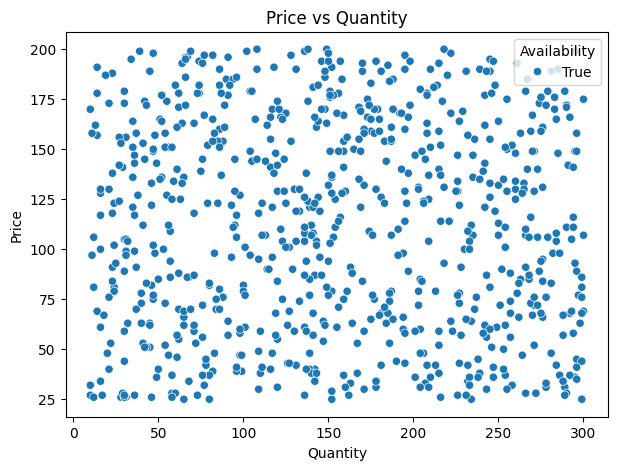

In [13]:
# ==========================
# Step 10: Relationship between price & quantity
# ==========================
plt.figure(figsize=(7,5))
sns.scatterplot(x="Quantity", y="Price", hue="Availability", data=df)
plt.title("Price vs Quantity")
plt.show()

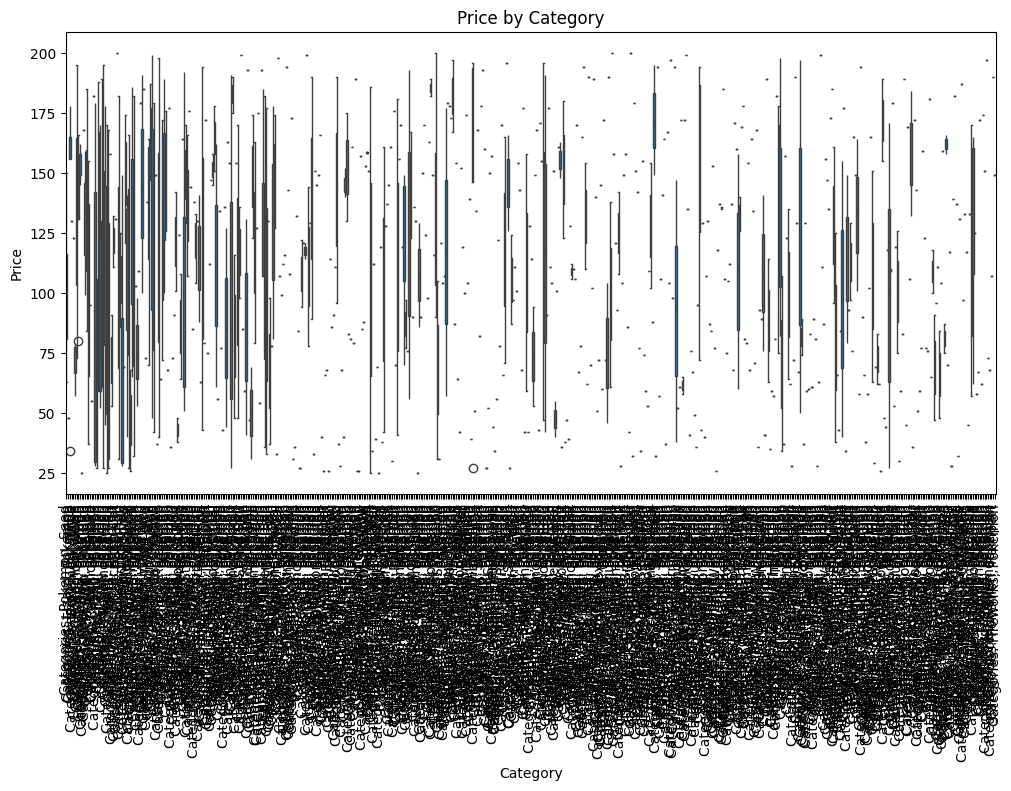

In [14]:
# ==========================
# Step 11: Boxplot per category
# ==========================
plt.figure(figsize=(12,6))
sns.boxplot(x="Category", y="Price", data=df)
plt.title("Price by Category")
plt.xticks(rotation=90)
plt.show()

Correlation matrix:
             Price  Quantity
Price     1.000000 -0.034093
Quantity -0.034093  1.000000 



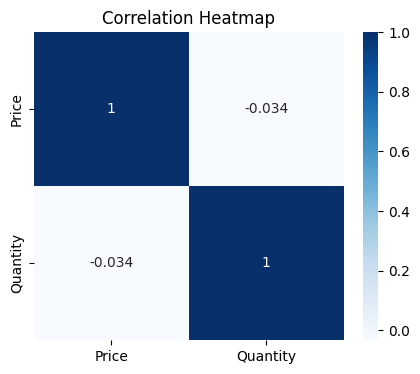

In [15]:
# ==========================
# Step 12: Correlation matrix
# ==========================
corr = df[["Price", "Quantity"]].corr()
print("Correlation matrix:")
print(corr, "\n")

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()